In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

2023-08-10 17:37:08.530565: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [4]:
img = "/home/jimmy31024/articover/images/inputs/sample12.png"
mask = "/home/jimmy31024/articover/images/masks/mask2/inpaint.png"

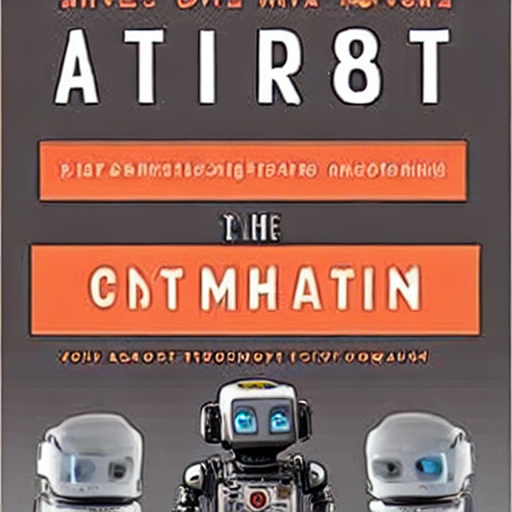

In [5]:
image = PIL.Image.open(img).resize((512, 512))
image

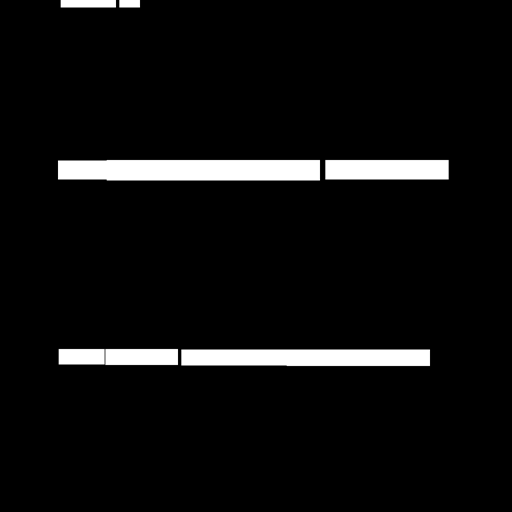

In [6]:
mask_image = PIL.Image.open(mask).resize((512, 512))
mask_image

In [7]:
prompt = "plain background"

guidance_scale=7.5
num_samples = 3
generator = torch.Generator(device="cuda").manual_seed(0) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

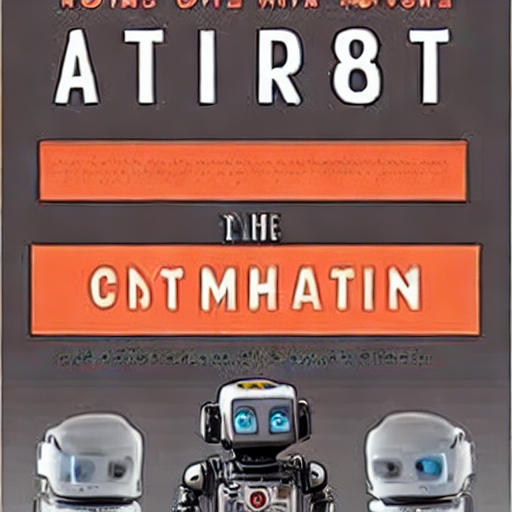

In [8]:
images[0]

In [9]:
inpainted_image=images[0].resize((256, 256))

In [10]:
import os 
os.chdir('/home/jimmy31024/articover/images/inpainted')
inpainted_image.save('inpainted2.png')